<a href="https://colab.research.google.com/github/code-natalia/dataquest-datacamp-projects/blob/main/R_vizualizing_COVID_data/R_vizualizing_COVID_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [15]:
%%R
# Load the readr, ggplot2, and dplyr packages
library(readr)
library(ggplot2)
library(dplyr)

# Read datasets/confirmed_cases_worldwide.csv into confirmed_cases_worldwide
confirmed_cases_worldwide <- read_csv("datasets/confirmed_cases_worldwide.csv")

# See the result
head(confirmed_cases_worldwide)

Rows: 56 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (1): cum_cases
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 6 × 2
  date       cum_cases
  <date>         <dbl>
1 2020-01-22       555
2 2020-01-23       653
3 2020-01-24       941
4 2020-01-25      1434
5 2020-01-26      2118
6 2020-01-27      2927


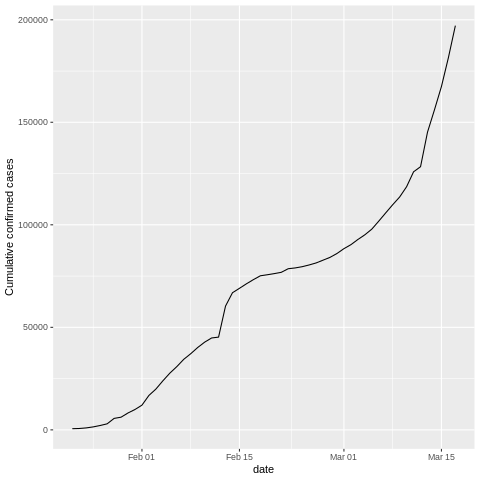

In [16]:
%%R
# Draw a line plot of cumulative cases vs. date
# Label the y-axis
ggplot(confirmed_cases_worldwide, aes(date, cum_cases)) +
  geom_line() +
  ylab("Cumulative confirmed cases")

Rows: 112 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): is_china
dbl  (2): cases, cum_cases
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 112
Columns: 4
$ is_china  <chr> "China", "China", "China", "China", "China", "China", "China…
$ date      <date> 2020-01-22, 2020-01-23, 2020-01-24, 2020-01-25, 2020-01-26,…
$ cases     <dbl> 548, 95, 277, 486, 669, 802, 2632, 578, 2054, 1661, 2089, 47…
$ cum_cases <dbl> 548, 643, 920, 1406, 2075, 2877, 5509, 6087, 8141, 9802, 118…


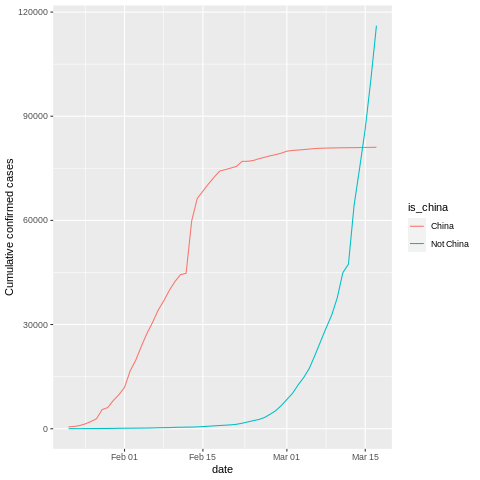

In [17]:
%%R
# Read in datasets/confirmed_cases_china_vs_world.csv
confirmed_cases_china_vs_world <- read_csv("datasets/confirmed_cases_china_vs_world.csv")

# See the result
glimpse(confirmed_cases_china_vs_world)

# Draw a line plot of cumulative cases vs. date, colored by is_china
# Define aesthetics within the line geom
plt_cum_confirmed_cases_china_vs_world <- ggplot(confirmed_cases_china_vs_world) +
  geom_line(aes(date, cum_cases, color = is_china)) +
  ylab("Cumulative confirmed cases")

# See the plot
plt_cum_confirmed_cases_china_vs_world

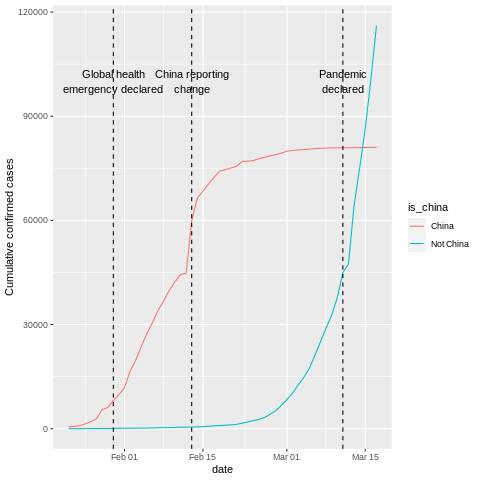

In [18]:
%%R
who_events <- tribble(
  ~ date, ~ event,
  "2020-01-30", "Global health\nemergency declared",
  "2020-03-11", "Pandemic\ndeclared",
  "2020-02-13", "China reporting\nchange"
) %>%
  mutate(date = as.Date(date))

# Using who_events, add vertical dashed lines with an xintercept at date
# and text at date, labeled by event, and at 100000 on the y-axis
plt_cum_confirmed_cases_china_vs_world +
  geom_vline(aes(xintercept = date), data = who_events, linetype = "dashed") +
  geom_text(aes(date, label = event), data = who_events, y = 1e5)

`geom_smooth()` using formula = 'y ~ x'


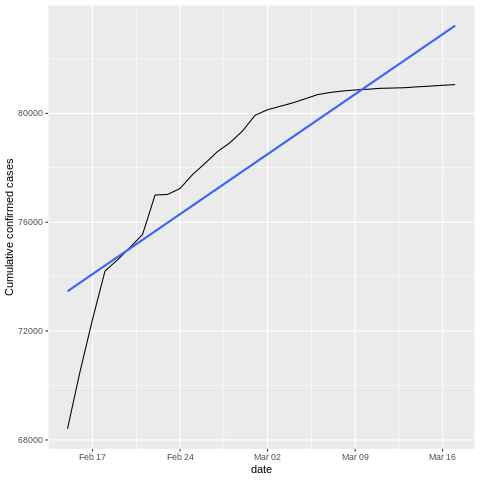

In [19]:
%%R
# Filter for China, from Feb 15
china_after_feb15 <- confirmed_cases_china_vs_world %>%
  filter(is_china == "China", date >= "2020-02-15")

# Using china_after_feb15, draw a line plot cum_cases vs. date
# Add a smooth trend line using linear regression, no error bars
ggplot(china_after_feb15, aes(date, cum_cases)) +
  geom_line() +
  geom_smooth(method = "lm", se = FALSE) +
  ylab("Cumulative confirmed cases")

`geom_smooth()` using formula = 'y ~ x'


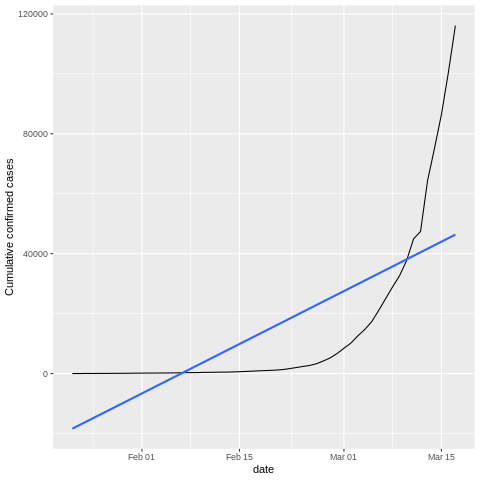

In [20]:
%%R
# Filter confirmed_cases_china_vs_world for not China
not_china <- confirmed_cases_china_vs_world %>%
  filter(is_china == "Not China")

# Using not_china, draw a line plot cum_cases vs. date
# Add a smooth trend line using linear regression, no error bars
plt_not_china_trend_lin <- ggplot(not_china, aes(date, cum_cases)) +
  geom_line() +
  geom_smooth(method = "lm", se = FALSE) +
  ylab("Cumulative confirmed cases")

# See the result
plt_not_china_trend_lin

`geom_smooth()` using formula = 'y ~ x'


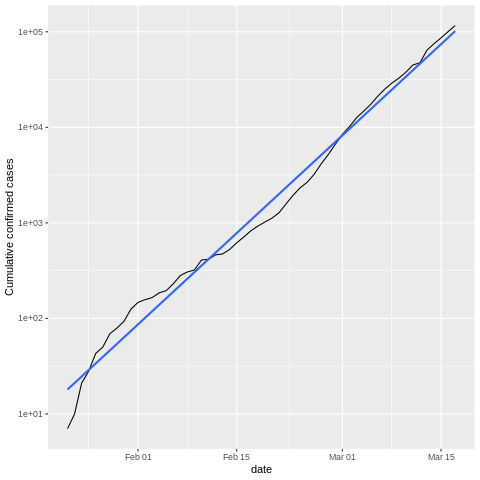

In [21]:
%%R
# Modify the plot to use a logarithmic scale on the y-axis
plt_not_china_trend_lin +
  scale_y_log10()

In [22]:
%%R
# Run this to get the data for each country
confirmed_cases_by_country <- read_csv("datasets/confirmed_cases_by_country.csv")
glimpse(confirmed_cases_by_country)

# Group by country, summarize to calculate total cases, find the top 7
top_countries_by_total_cases <- confirmed_cases_by_country %>%
  group_by(country) %>%
  summarize(total_cases = max(cum_cases)) %>%
  top_n(7, total_cases)

# See the result
top_countries_by_total_cases

Rows: 13272 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): country, province
dbl  (2): cases, cum_cases
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 13,272
Columns: 5
$ country   <chr> "Afghanistan", "Albania", "Algeria", "Andorra", "Antigua and…
$ province  <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ date      <date> 2020-01-22, 2020-01-22, 2020-01-22, 2020-01-22, 2020-01-22,…
$ cases     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ cum_cases <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
# A tibble: 7 × 2
  country      total_cases
  <chr>              <dbl>
1 France              7699
2 Germany             9257
3 Iran               16169
4 Italy              31506
5 Korea, South        8320
6 Spain              1174

Rows: 2030 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): country
dbl  (1): cum_cases
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2,030
Columns: 3
$ country   <chr> "Germany", "Iran", "Italy", "Korea, South", "Spain", "US", "…
$ date      <date> 2020-02-18, 2020-02-18, 2020-02-18, 2020-02-18, 2020-02-18,…
$ cum_cases <dbl> 16, 0, 3, 31, 2, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,…


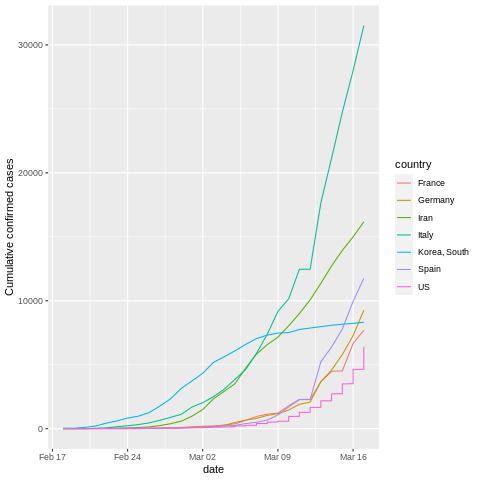

In [23]:
%%R
# Read in the dataset from datasets/confirmed_cases_top7_outside_china.csv
confirmed_cases_top7_outside_china <- read_csv("datasets/confirmed_cases_top7_outside_china.csv")

# Glimpse at the contents of confirmed_cases_top7_outside_china
glimpse(confirmed_cases_top7_outside_china)

# Using confirmed_cases_top7_outside_china, draw a line plot of
# cum_cases vs. date, colored by country
ggplot(confirmed_cases_top7_outside_china, aes(date, cum_cases, color = country)) +
  geom_line() +
  ylab("Cumulative confirmed cases")